In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
from Confocal_GUI.live_plot import change_to_inline, change_to_widget, enable_long_output, DataFigure
from Confocal_GUI.logic import ple, pl, live, odmr, GUI
from Confocal_GUI.device import VirtualScanner, VirtualCounter, VirtualWaveMeter, VirtualRF\
, VirtualLaserStabilizer, initialize_classes, VirtualPulse
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
# initialize all classes and functions, bind them to devices wanted
enable_long_output()
# make sure that GUI() can output fig to jupyter notebook cell without being scrolled

config = {    
    'scanner': {'type': 'VirtualScanner'},
    'counter': {'type': 'VirtualCounter'},    
    'wavemeter': {'type': 'VirtualWaveMeter'},    
    'rf': {'type': 'VirtualRF'},
    'pulse': {'type': 'VirtualPulse'},
    'laser_stabilizer': {'type': 'VirtualLaserStabilizer','config_instances':'config_instances'},
        
}
# scanner, counter, laser_stabilizer, wavemeter, laser etc. 
# are default keys for all functions to call objetive, 'type' defines bind which class
# or function to the key.

config_instances = initialize_classes(config, lookup_dict=globals(), namespace=globals())

# below are parameters for test only
pl_test_dict = {'pl_height':10000, 'pl_width':4, 'pl_center':[5, -5], 'pl_bg':5000}
ple_test_dict = {'ple_height':100000, 'ple_width':0.001, 'ple_center':737.102, 'ple_bg':20000}
odmr_test_dict = {'odmr_height':10000, 'odmr_width':20e6, 'odmr_center':2.88e9}

config_instances={**config_instances, **pl_test_dict, **ple_test_dict, **odmr_test_dict}

scanner => <Confocal_GUI.device.base.VirtualScanner object at 0x00000225A0993E00>
counter => <Confocal_GUI.device.base.VirtualCounter object at 0x00000225A0AA9010>
wavemeter => <Confocal_GUI.device.base.VirtualWaveMeter object at 0x00000225A0AA92B0>
rf => <Confocal_GUI.device.base.VirtualRF object at 0x00000225A0AA9160>
pulse => <Confocal_GUI.device.base.VirtualPulse object at 0x00000225A0AA9400>
laser_stabilizer => <Confocal_GUI.device.base.VirtualLaserStabilizer object at 0x00000225A0AA9550>

Now you can call devices using e.g. config_instances["rf"].gui() or rf.gui()


<h1 style="color: blue;">Basic Operations</h1>

In [3]:
# try access to device gui
pulse.gui()

In [4]:
rf.gui()

In [5]:
# try help to get how to call ple measurement
help(ple)

Help on function ple in module Confocal_GUI.logic.base:

ple(**kwargs)
    ple
    
    args:
    (data_x=None, exposure=0.1, config_instances=None, repeat=1, is_GUI=False,
    counter_mode='apd', data_mode='single', relim_mode='normal'):
    
    example:
    fig, data_figure = ple(data_x=np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, 
                            config_instances=config_instances, repeat=1, is_GUI=False, 
                            counter_mode='apd', data_mode='single', relim_mode='normal')



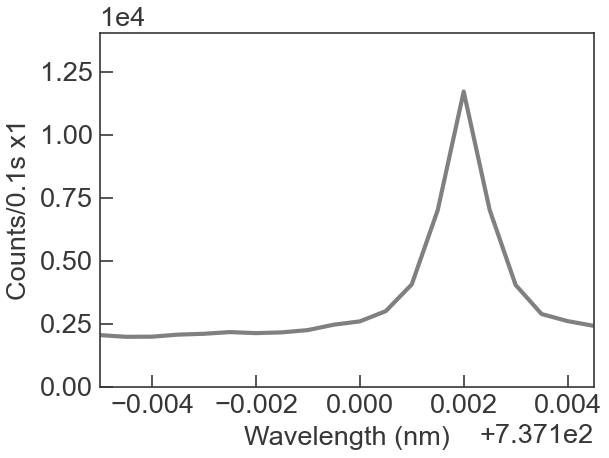

In [8]:
# try live plot in notebook, can be interrupted by 'interrupt' button in jupyter notebook
fig, data_figure = ple(data_x=np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances=config_instances, repeat=1, is_GUI=False)

In [ ]:
# try click the fig using right mouse
# or select area using left mouse
# or zoom in/out using middle mouse

In [9]:
# try get data from data_figure
print('data_x', data_figure.data_x)
print('data_y', data_figure.data_y)

data_x [737.095  737.0955 737.096  737.0965 737.097  737.0975 737.098  737.0985
 737.099  737.0995 737.1    737.1005 737.101  737.1015 737.102  737.1025
 737.103  737.1035 737.104  737.1045]
data_y [[ 2053.]
 [ 1986.]
 [ 1991.]
 [ 2072.]
 [ 2106.]
 [ 2173.]
 [ 2131.]
 [ 2162.]
 [ 2252.]
 [ 2467.]
 [ 2597.]
 [ 3005.]
 [ 4064.]
 [ 7009.]
 [11712.]
 [ 7018.]
 [ 4041.]
 [ 2889.]
 [ 2608.]
 [ 2422.]]


In [10]:
# save data
data_figure.save('')

saved fig as PLE2025_01_23_23_20_44.npz


In [9]:
# try fit the lorent curve
_, popt = data_figure.lorent()

In [10]:
# or clear fit
data_figure.clear()

Keys in npz file: ['data_x', 'data_y', 'info']
{'measurement_name': 'PLE', 'plot_type': '1D', 'exposure': 0.1, 'repeat': 1, 'scanner': (0, 0), 'x_label': 'Wavelength (nm)', 'y_label': 'Counts/0.1s x1'}


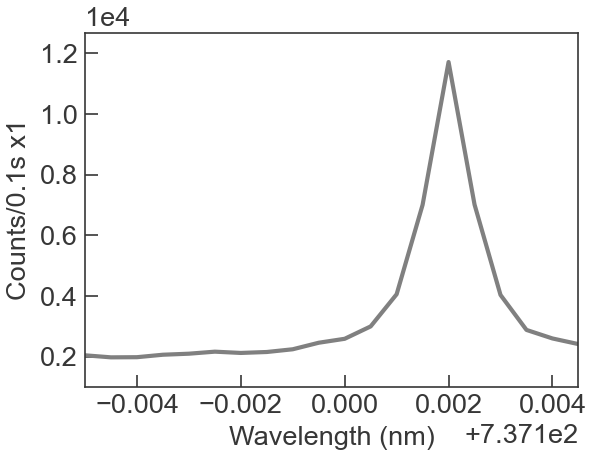

In [11]:
# load data back
data_figure = DataFigure(None, address='PLE2025_01_23_23_20*')

Plot stopped
PLE started
saved fig as 2025_01_23/PLE2025_01_23_23_21_12.npz
info: {'measurement_name': 'PLE', 'plot_type': '1D', 'exposure': 0.1, 'repeat': 1, 'scanner': (0, 0)}

        2025_01_23_23_21_13
        


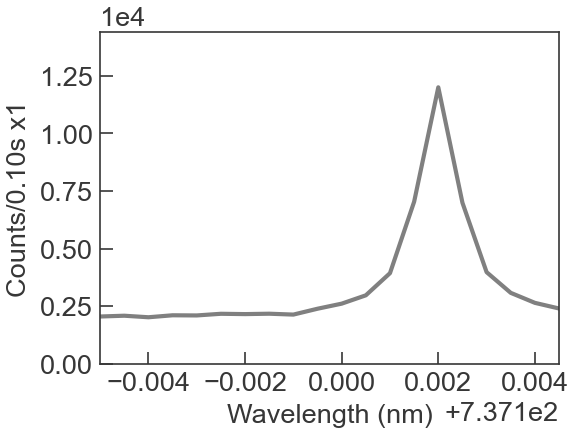

saved PLE


In [12]:
# try live plot in pyqt5 GUI
fig, data_figure = ple(data_x=np.arange(737.1-0.005, 737.1+0.005, 0.0005), exposure=0.1, \
                                config_instances=config_instances, repeat=1, is_GUI=True)

In [13]:
help(pl)

Help on function pl in module Confocal_GUI.logic.base:

pl(**kwargs)
    pl
    
    args:
    (x_array=None, y_array=None, exposure=0.1, config_instances=None, repeat=1, wavelength=None, 
    is_GUI=False, is_dis=True, 
    counter_mode='apd', data_mode='single', relim_mode='normal'):
    
    example:
    fig, data_figure = pl(x_array = np.arange(-10, 10, 1), y_array = np.arange(-10, 10, 1), exposure=0.1, 
                            config_instances=config_instances, repeat=1, is_GUI=False, is_dis=True,
                            counter_mode='apd', data_mode='single', relim_mode='normal')



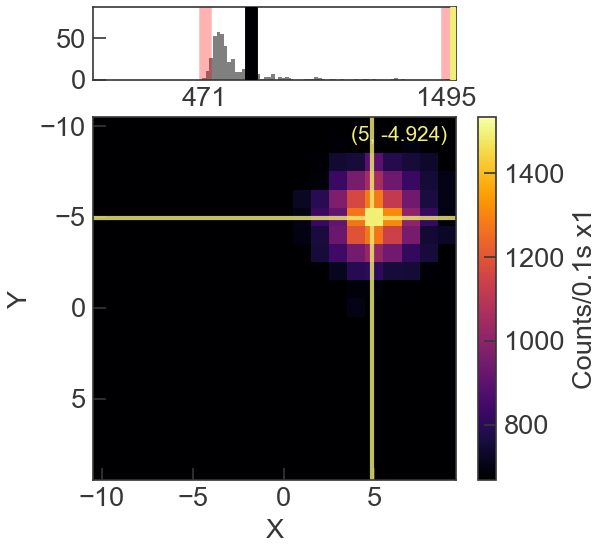

In [14]:
# similarly try pl
fig, data_figure = pl(x_array = np.arange(-10, 10, 1), y_array = np.arange(-10, 10, 1), exposure=0.1,\
                            config_instances=config_instances, repeat=1, is_GUI=False, is_dis=True,\
                            counter_mode='apd', data_mode='single', relim_mode='normal')

In [ ]:
# try click the fig using right mouse
# or select area using left mouse
# or zoom in/out using middle mouse
# and try move axvline in distribution plot to change colorbar

Plot stopped
PL started
saved fig as 2025_01_20/PL2025_01_20_22_32_13.npz
info: {'measurement_name': 'PL', 'plot_type': '2D', 'exposure': 0.01000000000000001, 'repeat': 1, 'wavelength': None}

        2025_01_20_22_32_13
        


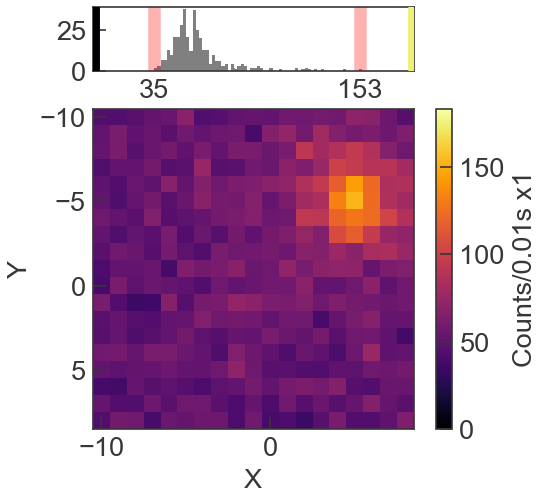

saved PL


In [15]:
# similarly try pl
fig, data_figure = pl(x_array = np.arange(-10, 10, 1), y_array = np.arange(-10, 10, 1), exposure=0.1,\
                            config_instances=config_instances, repeat=1, is_GUI=True, is_dis=True,\
                            counter_mode='apd', data_mode='single', relim_mode='normal')

In [16]:
help(live)

Help on function live in module Confocal_GUI.logic.base:

live(**kwargs)
    live
    
    args:
    (data_x=None, exposure=0.1, config_instances=None, is_finite=False, repeat=1, 
    counter_mode='apd', data_mode='single', relim_mode='normal'):
    
    example:
    fig, data_figure = live(data_x = np.arange(100), exposure=0.1, 
                            config_instances=config_instances, repeat=1, is_finite=False,
                            counter_mode='apd', data_mode='single', relim_mode='normal')



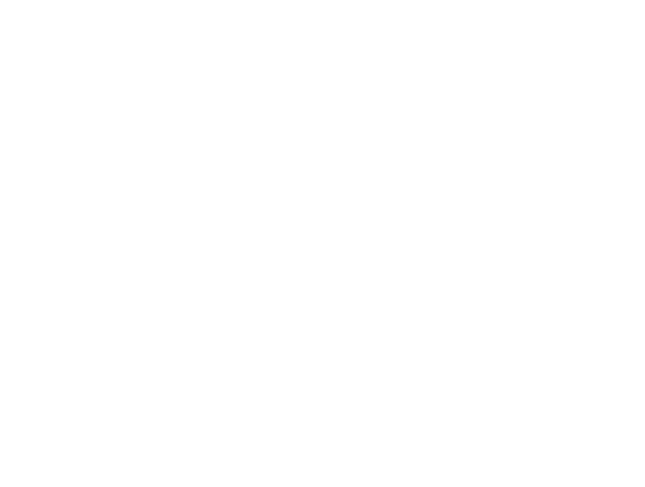

In [6]:
# try live
fig, data_figure = live(data_x = np.arange(100), exposure=0.1,\
                        config_instances=config_instances, repeat=1, is_finite=False,\
                        counter_mode='analog', data_mode='single', relim_mode='normal')

In [18]:
# get doc string of GUI
help(GUI)

Help on function GUI in module Confocal_GUI.logic.GUI_wrapper:

GUI(config_instances, measurement_PL='pl', measurement_PLE='ple', measurement_Live='live')
    GUI
    
    args:
    measurement_PLE can be any measurement of 1D plot_type, such as 'odmr', 'rabi', 'spinecho' etc.
    
    example:
    GUI(config_instances=config_instances) or GUI(config_instances=config_instances, measurement_PLE='odmr')
    
    GUI notes:
    
        Load file: 
        button to load any 1D or 2D saved measurements (*.npz) into GUI
    
        Read X,Y range/Read range: 
        button to read range from figure when there is a area selector enabled by left mouse
    
        Read X,Y/Read {measurement_PLE.x_name}: 
        button to read data from figure when there is a cross selector enabled by right mouse click
    
        Start/Stop {measurement_PLE/PL.measurement_name}: 
        button to start or stop live plot
    
        Set device: 
        button to select device from combobox on the right

In [19]:
# try GUI operations
GUI(config_instances=config_instances, measurement_PLE='odmr')

Plot stopped
Keys in npz file: ['data_x', 'data_y', 'info']
{'measurement_name': 'PLE', 'plot_type': '1D', 'exposure': 0.1, 'repeat': 1, 'scanner': (0, 0), 'x_label': 'Wavelength (nm)', 'y_label': 'Counts/0.1s x1'}
Plot stopped
Keys in npz file: ['data_x', 'data_y', 'info']
{'measurement_name': 'PLE', 'plot_type': '1D', 'exposure': 0.1, 'repeat': 1, 'scanner': (0, 0), 'x_label': 'Wavelength (nm)', 'y_label': 'Counts/0.1s x1'}


<h1 style="color: blue;">Advanced Features</h1>

In [20]:
help(odmr)

Help on function odmr in module Confocal_GUI.logic.base:

odmr(**kwargs)
    odmr
    
    args:
    (data_x=None, exposure=0.1, power=-10, config_instances=None, repeat=1, is_GUI=False,
    counter_mode='apd', data_mode='single', relim_mode='normal'):
    
    example:
    fig, data_figure = odmr(data_x=np.arange(2.88-0.1, 2.88+0.1, 0.001), exposure=0.1, 
                            power=-10, 
                            config_instances=config_instances, repeat=1, is_GUI=False, 
                            counter_mode='apd', data_mode='single', relim_mode='normal')



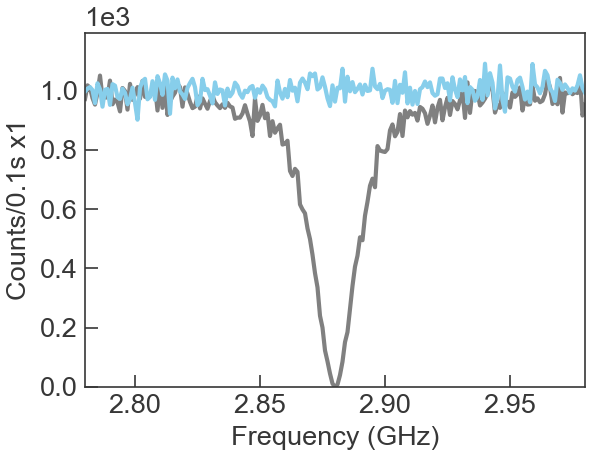

In [24]:
# data_mode can be 'single', 'ref_div', 'ref_sub', 'dual'
# depends on how counter.read_counts() returns data
# if returns [data, data_ref]
# then 'ref_div' plots data/data_ref, 'ref_sub' plots data - data_ref, 'dual' plots two lines
fig, data_figure = odmr(data_x=np.arange(2.88-0.1, 2.88+0.1, 0.001), exposure=0.1,\
                            power=-10,\
                            config_instances=config_instances, repeat=1, is_GUI=False,\
                            counter_mode='apd', data_mode='dual', relim_mode='normal')

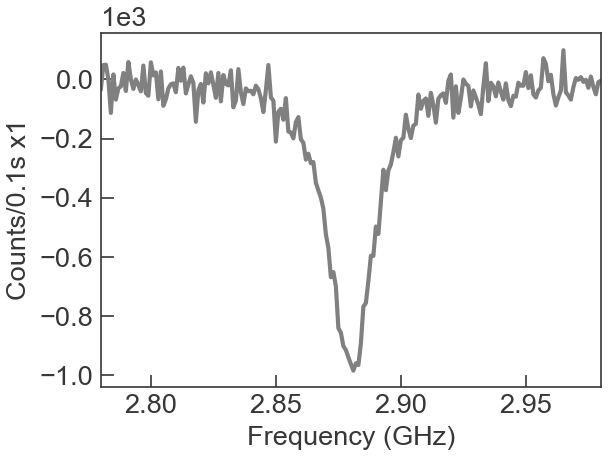

In [25]:
fig, data_figure = odmr(data_x=np.arange(2.88-0.1, 2.88+0.1, 0.001), exposure=0.1,\
                            power=-10,\
                            config_instances=config_instances, repeat=1, is_GUI=False,\
                            counter_mode='apd', data_mode='ref_sub', relim_mode='normal')

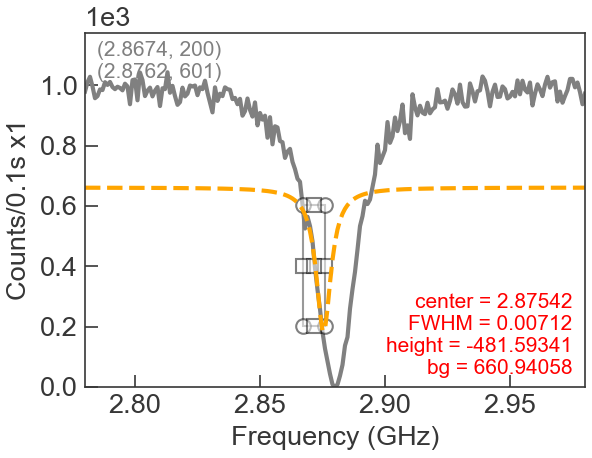

In [24]:
fig, data_figure = odmr(data_x=np.arange(2.88-0.1, 2.88+0.1, 0.001), exposure=0.1,\
                            power=-10,\
                            config_instances=config_instances, repeat=1, is_GUI=False,\
                            counter_mode='apd', data_mode='single', relim_mode='normal')
# fit of data_figure can also fit only part of the data using area selector

In [27]:
# it may return wrong fitting since data is not complete but may be useful sometimes
_, popt = data_figure.lorent()

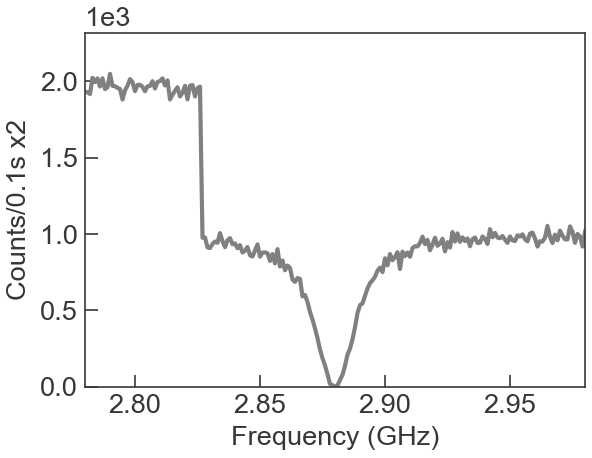

In [29]:
# repeat defines how many times the measurements should be repeated, default is 1
fig, data_figure = odmr(data_x=np.arange(2.88-0.1, 2.88+0.1, 0.001), exposure=0.1,\
                            power=-10,\
                            config_instances=config_instances, repeat=3, is_GUI=False,\
                            counter_mode='apd', data_mode='single', relim_mode='normal')

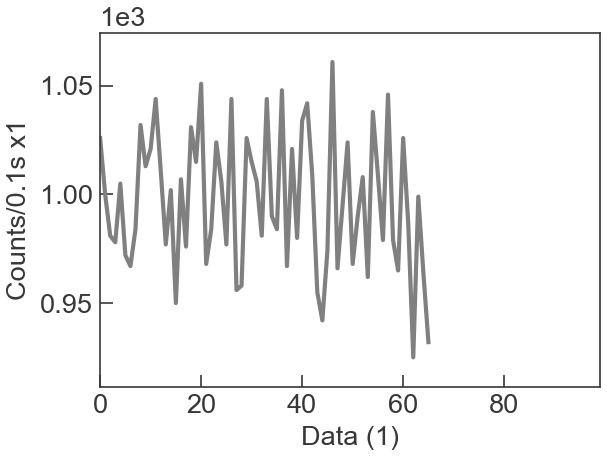

In [4]:
# relim_mode tells how live plot handles relim mode, tight fit to data ('tight') or from 0 to max(data_y) ('normal')
fig, data_figure = live(data_x = np.arange(100), exposure=0.1,\
                        config_instances=config_instances, repeat=1, is_finite=False,\
                        counter_mode='apd', data_mode='single', relim_mode='tight')

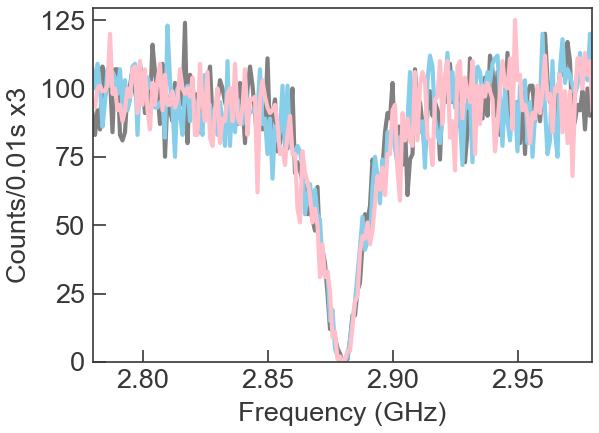

In [7]:
# update_mode defines how measurement update new data
# update_mode 'normal' for adding new data point for repeat>1, default for all 1D measurement
# update_mode 'roll' for roll the data_y array and append new data, default for live
# update_mode 'new' for adding new line for repeat>1
# update_mode 'single' for only display single y at a certain x, default for all 2D measurement
# update_mode 'adaptive' for increasing exposure if current data point is few-sigma above average

fig, data_figure = odmr(data_x=np.arange(2.88-0.1, 2.88+0.1, 0.001), exposure=0.01,\
                            power=-10,\
                            config_instances=config_instances, repeat=3, is_GUI=False,\
                            counter_mode='apd', data_mode='single', relim_mode='normal', update_mode='new')

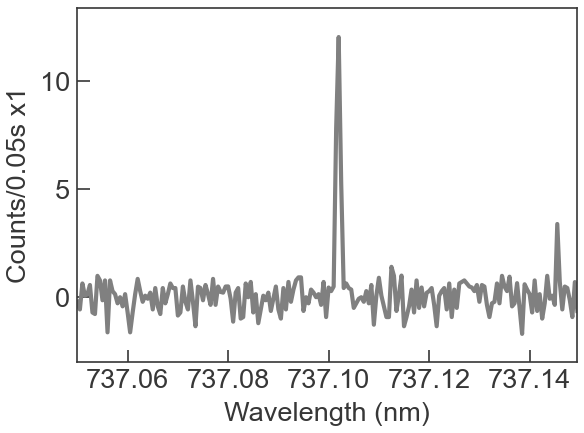

In [20]:
# update_mode 'adaptive'
ple_test_dict = {'ple_height':1000, 'ple_width':0.001, 'ple_center':737.102, 'ple_bg':1000}
fig, data_figure = ple(data_x=np.arange(737.1-0.05, 737.1+0.05, 0.0005), exposure=0.05, \
                                config_instances={**config_instances, **ple_test_dict}, repeat=1, is_GUI=False, \
                               update_mode='adaptive', data_mode='ref_sub')

# can detect small signal with a minimal time overhead

In [3]:
# read help of pulse.gui()
help(pulse.gui)

Help on method gui in module Confocal_GUI.device.base:

gui(is_in_GUI=False) method of Confocal_GUI.device.base.VirtualPulse instance
    GUI:
    
        Off Pulse/On Pulse:
            button to off and on pulse, using pulse sequence currently in the GUI.
            On pulse will also save current pulse sequence.
    
        Remove/Add Column:
            button to remove or add one more pulse column
    
        Save to/Load from file:
            button to save pulse to file(*pulse.npz) or load from saved pulse(*pulse.npz)
            
        Save Pulses:
            button to apply current pulse sequence (potentially used by measurement) but not on pulse.
    
        Add/Delete Bracket:
            button to add a bracket which defines which part of pulse sequence should be repeated
    
        Ref settings:
            if checkbox is checked, will automatically repeat current sequence another time for reference,
            where the second sequence disables signal and repl

In [ ]:
# try load file from 'src/Confocal_GUI/device/Rabi_pulse.npz'
pulse.gui()